# NACHOS12.L75-MAA09

__creation__ : 29/06/2017

__purpose__ : same as [NACHOS12.L75-MAA06](2017-05-16-AA-NACHOS12.L75-MAA06.html) with initial state and bdy from GLORYS2V4 instead of GLORYS2V3 and coordinates v2.0

__outcome__ : time_step at 360 for one month, then 480. Problem with SSS damping, wrong weight file produce strange water forcings

## First year of simulations

In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


%matplotlib inline

/home/users/albert6a/anaconda2/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


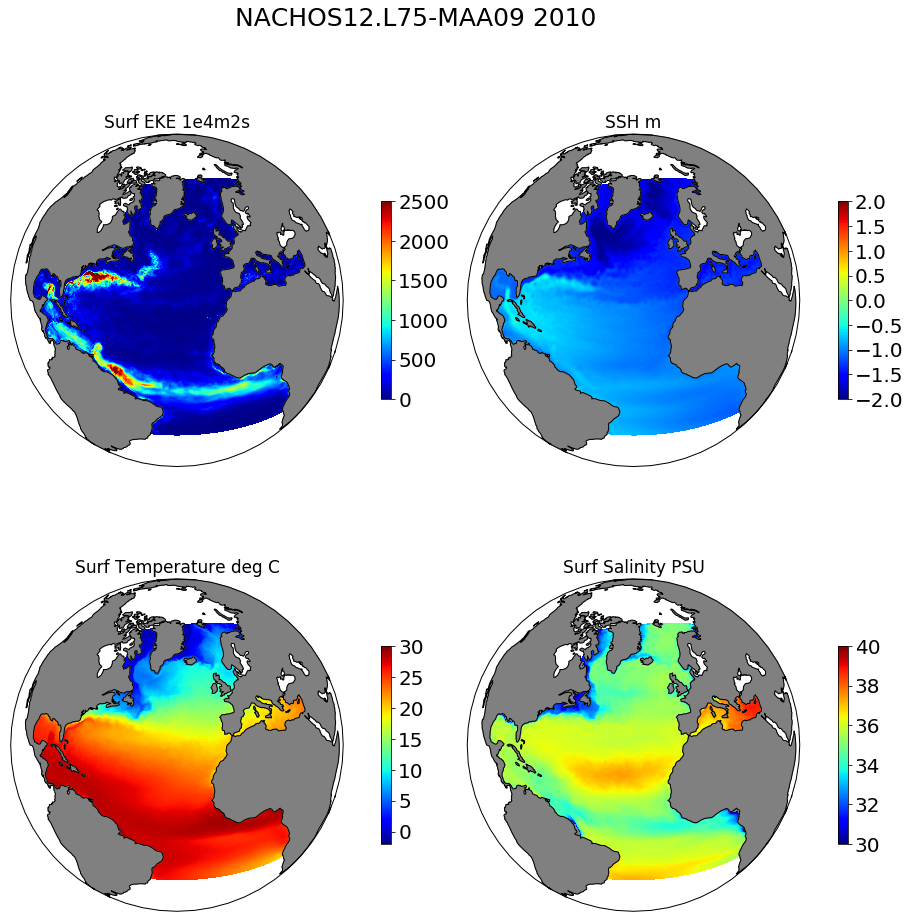

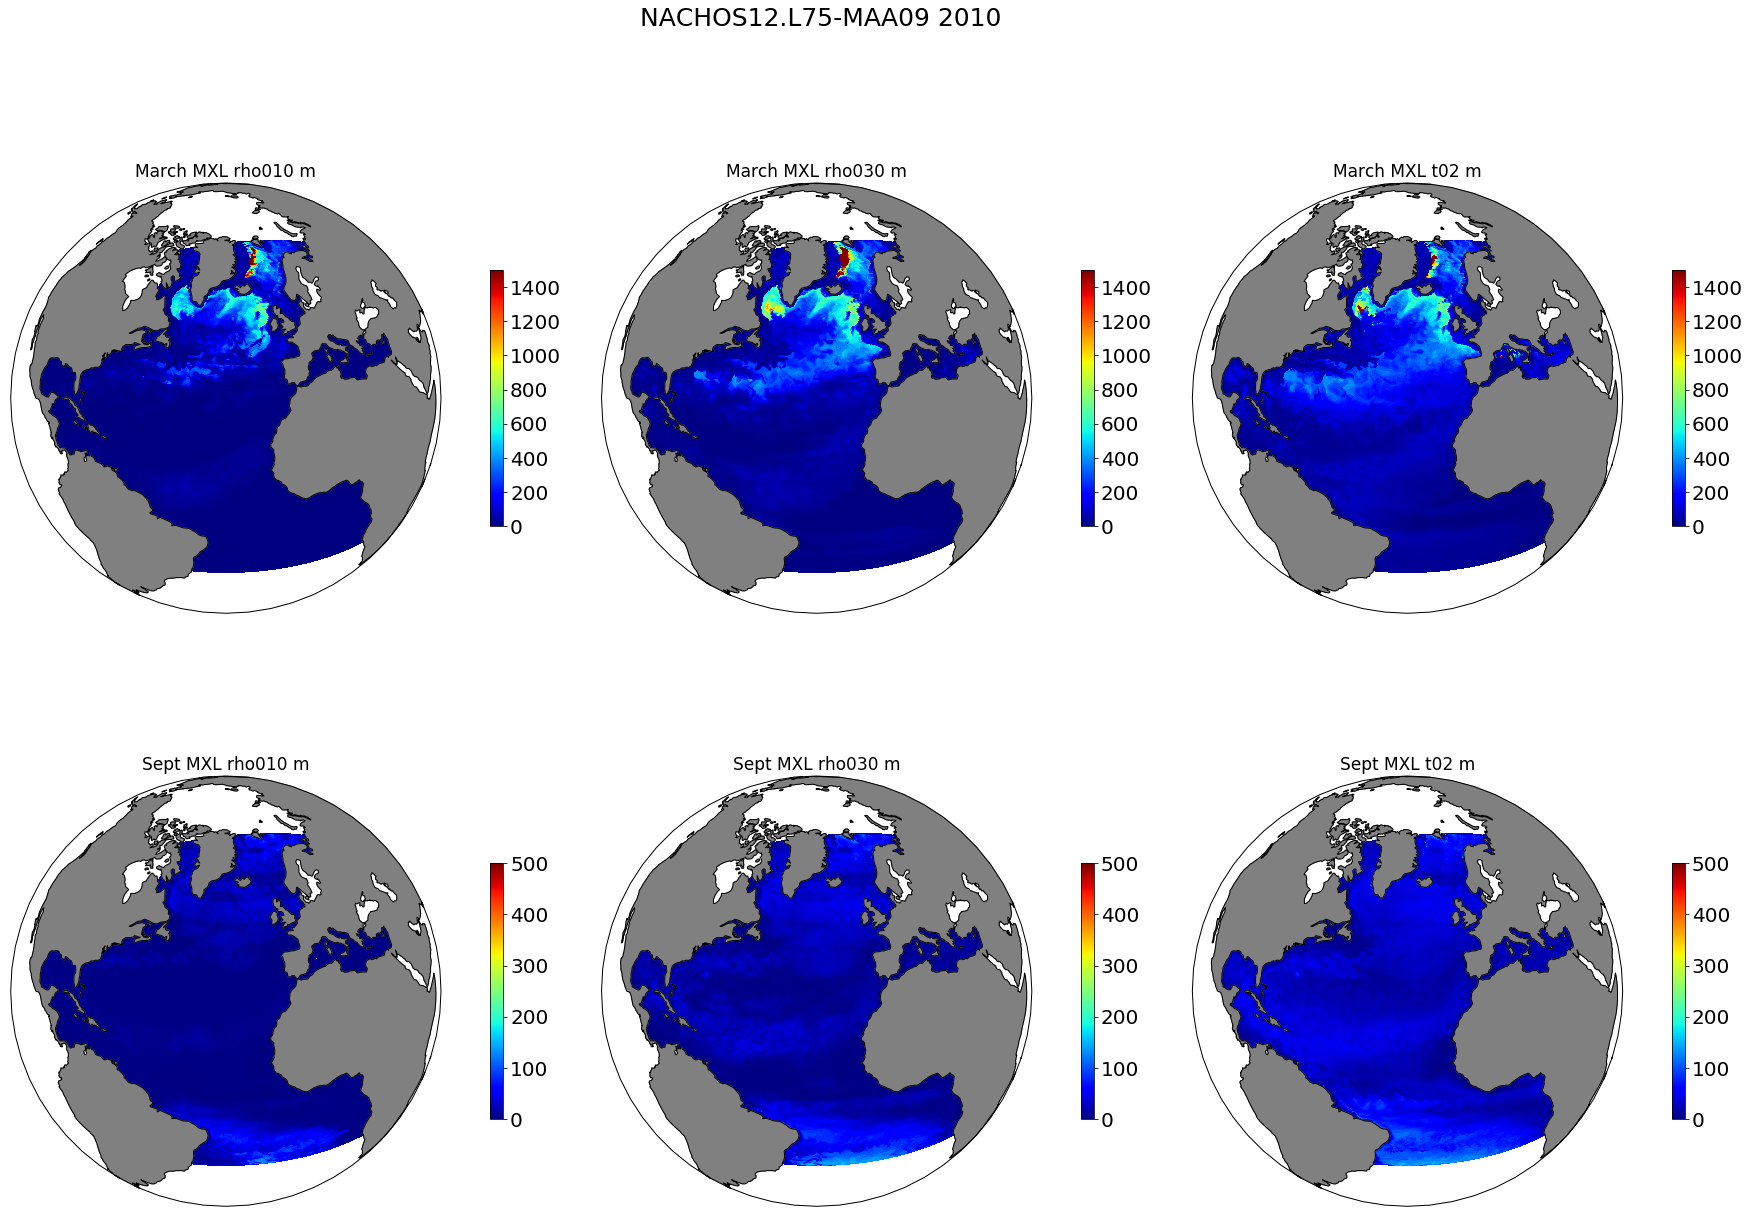

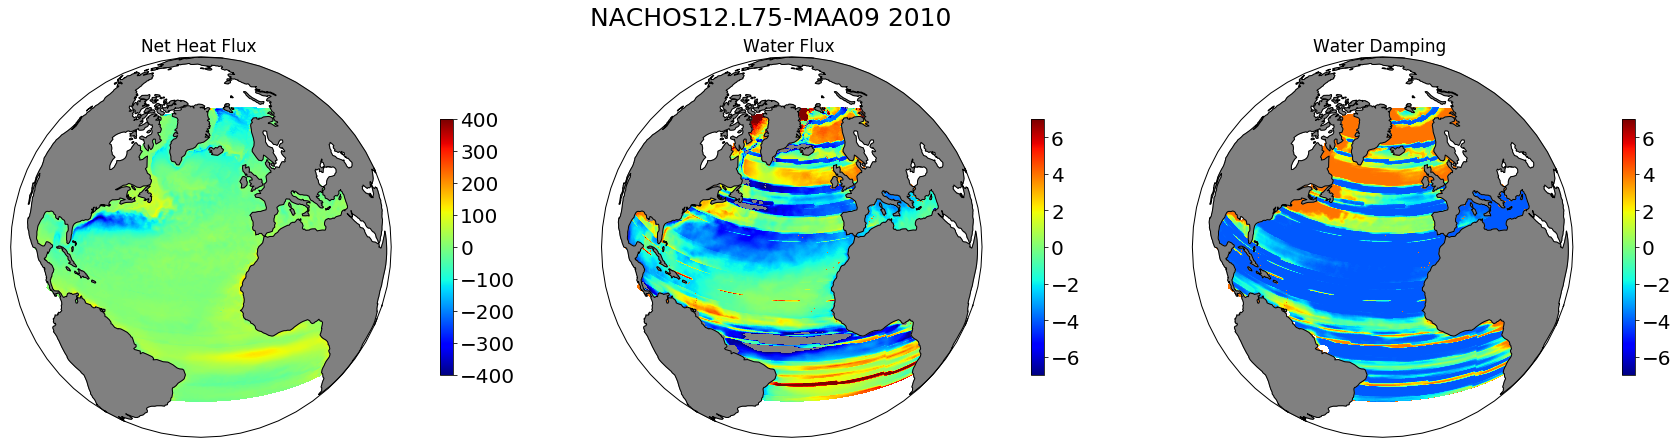

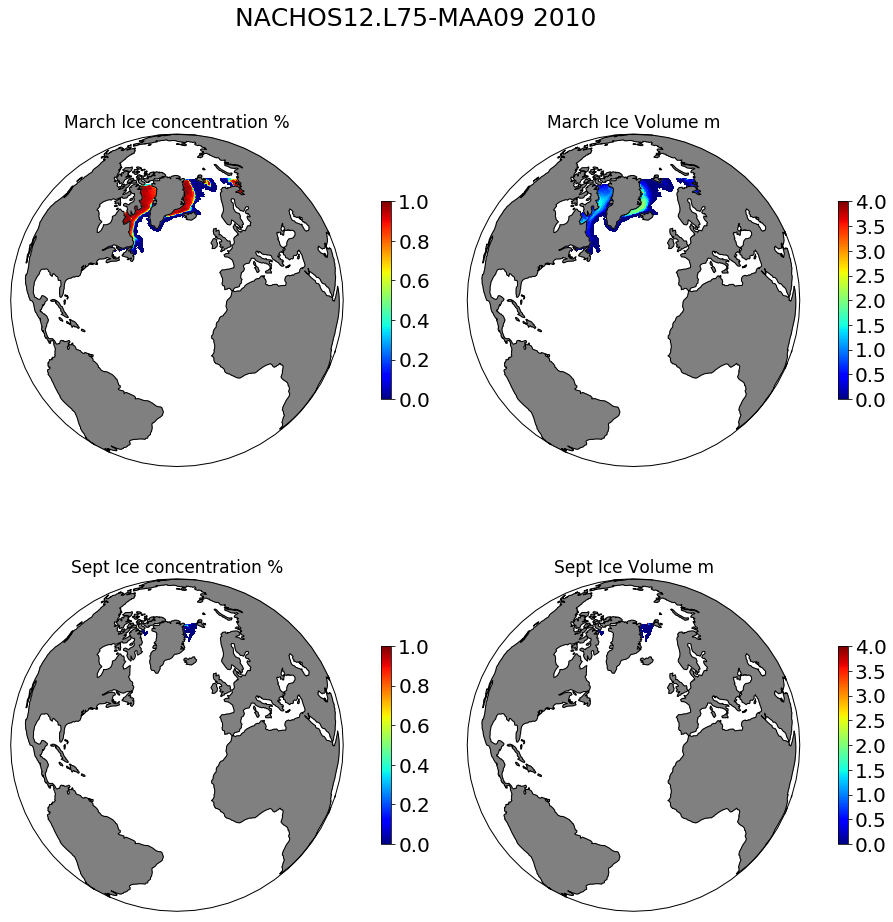

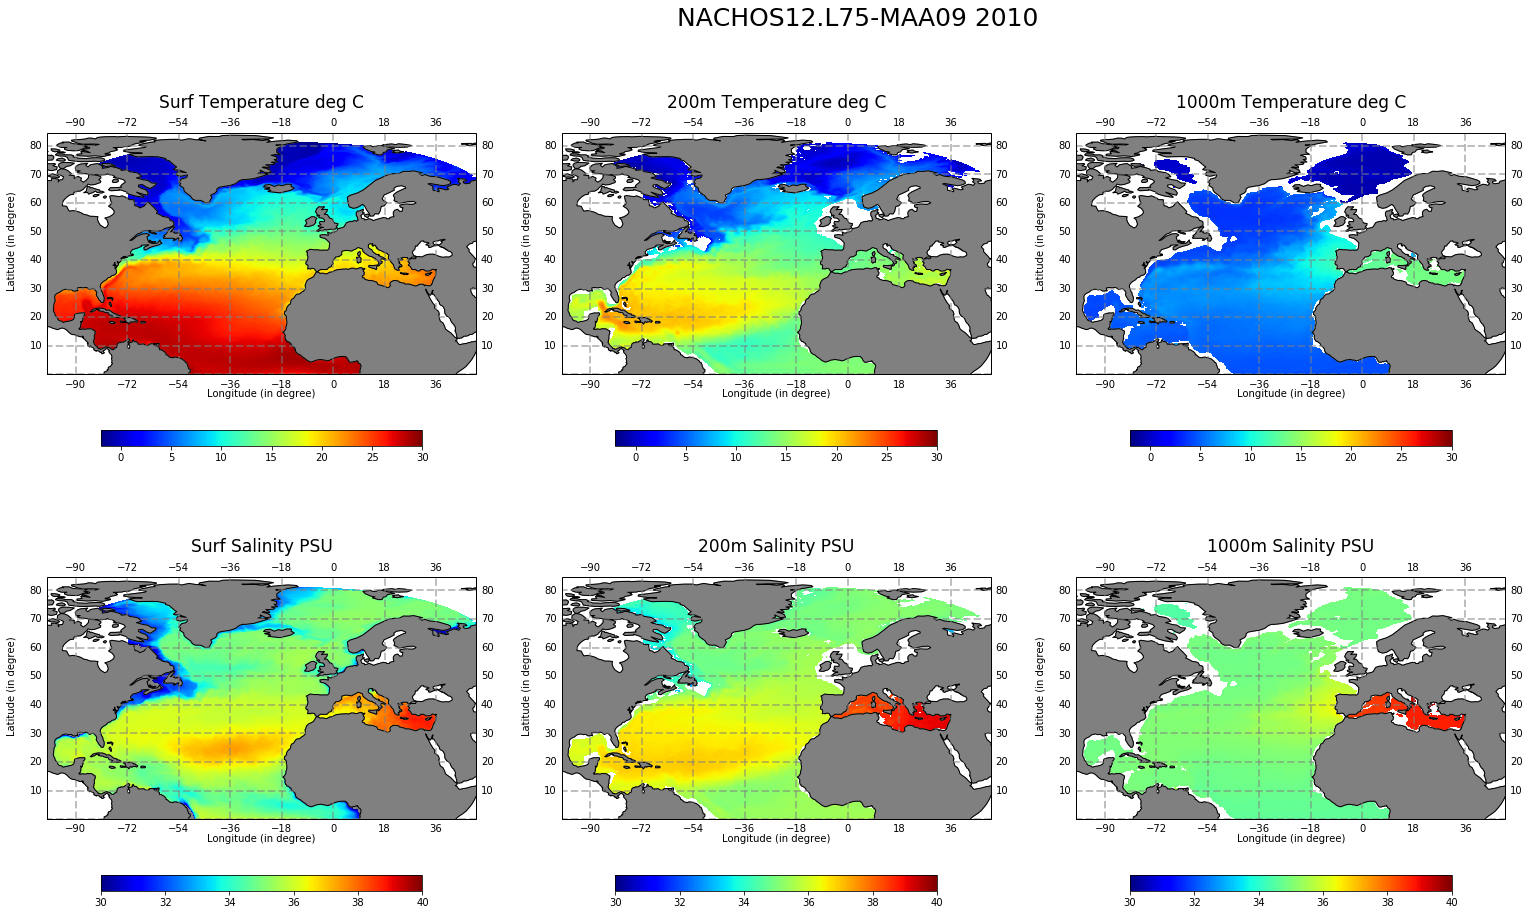

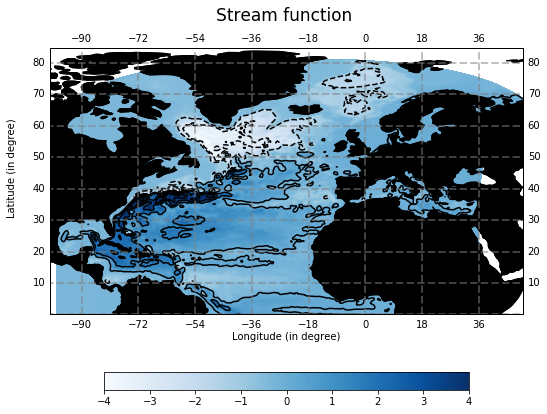

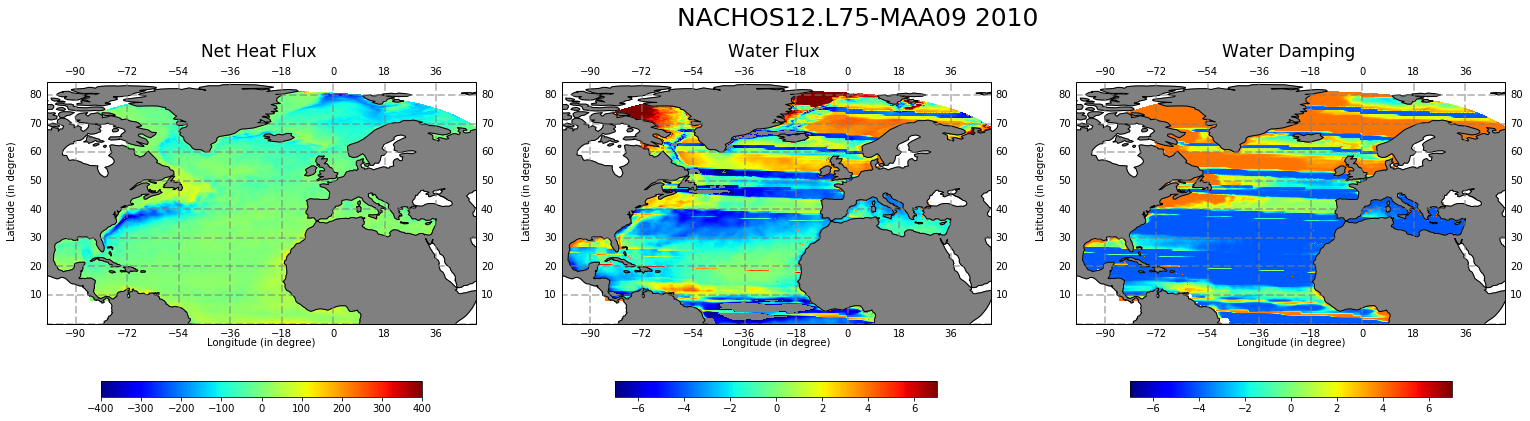

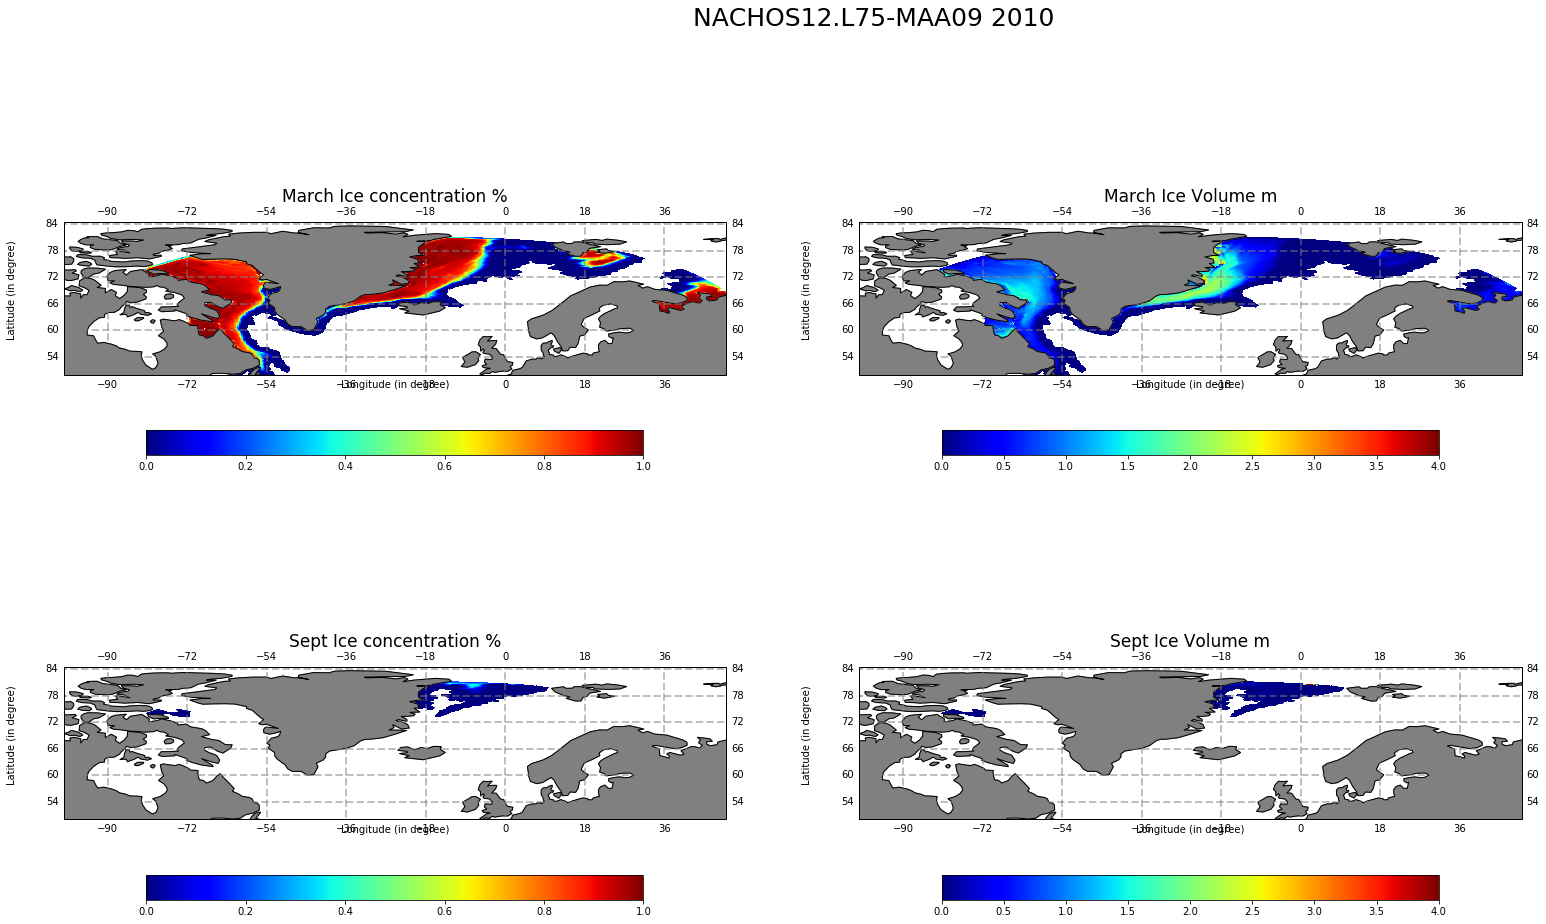

In [2]:
# Paramètres

case='MAA09'
year='2010'

dirmean='/home/users/albert6a/Data/NACHOS12.L75/NACHOS12.L75-MAA09-MEAN/'
dirplot='/home/users/albert6a/Data/NACHOS12.L75/NACHOS12.L75-MAA09-PLOTS/'

title="NACHOS12.L75-"+case+" "+year

# Les données

fileflxT=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_flxT.nc'
fileT=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_gridT.nc'
fileEKE=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_EKE.nc'
fileMXL03=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m03.1d_MXL.nc'
fileMXL09=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m09.1d_MXL.nc'
fileICE03=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m03.1d_icemod3.nc'
fileICE09=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m09.1d_icemod3.nc'
filePSI=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_PSI.nc'

dsT=xr.open_dataset(fileT)
tem=dsT.votemper[0]
sal=dsT.vosaline[0]
ssh=dsT.sossheig[0]
lat=dsT.nav_lat
lon=dsT.nav_lon

dsMXL03=xr.open_dataset(fileMXL03)
mxl03_rho010=dsMXL03.somxl010[0]
mxl03_rho030=dsMXL03.somxl030[0]
mxl03_t02=dsMXL03.somxlt02[0]
dsMXL09=xr.open_dataset(fileMXL09)
mxl09_rho010=dsMXL09.somxl010[0]
mxl09_rho030=dsMXL09.somxl030[0]
mxl09_t02=dsMXL09.somxlt02[0]

dsEKE=xr.open_dataset(fileEKE)
eke=dsEKE.voeke[0,0]

dsPSI=xr.open_dataset(filePSI)
psi=dsPSI.sobarstf[0]

dsflxT=xr.open_dataset(fileflxT)
Heat=dsflxT.sohefldo[0]
WaterFlx=dsflxT.sowaflup[0]
WaterDmp=dsflxT.sowafld[0]

dsICE03=xr.open_dataset(fileICE03)
iconc03=dsICE03.siconc[0]
ivolu03=dsICE03.sivolu[0]
dsICE09=xr.open_dataset(fileICE09)
iconc09=dsICE09.siconc[0]
ivolu09=dsICE09.sivolu[0]

# Les différents types de plots

def plot_glob(fig,sub,var,vmin,vmax,unit,name):
    ax = fig.add_subplot(sub,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set_global()
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1)
    cbar.ax.tick_params(labelsize=20)
    ax.set_title(name+' '+unit,size=17)

def plot_atl(fig,sub,var,vmin,vmax,unit,name):
    ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
    ax.set_extent([-100, 50, 0, 70])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

    fig.subplots_adjust(right=0.8)
    ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)
    ax.set_title(name+' '+unit,size=17,y=1.08)
    
def plot_atl_cont(fig,sub,var,unit,name,vmin,vmax):
    ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
    ax.set_extent([-100, 50, 0, 70])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=plt.cm.Blues,vmin=vmin,vmax=vmax)
    pcont=ax.contour(lon,lat,ma.masked_invalid(var),10,colors='k',transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND,facecolor='black')
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='grey', alpha=0.5, linestyle='--')

    fig.subplots_adjust(right=0.8)
    ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)
    
    ax.set_title(name+' '+unit,size=17,y=1.08)
    
def plot_natl(fig,sub,var,vmin,vmax,unit,name):
    ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
    ax.set_extent([-100, 50, 50, 70])
    cmap = plt.cm.jet
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

    fig.subplots_adjust(right=0.8)
    ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)
    ax.set_title(name+' '+unit,size=17,y=1.09)
    
# Tous les plots

# Tous les plots glob

# Eke, SSH,T et S
fig = plt.figure(figsize=(15,15))
plot_glob(fig,221,10000*eke,0,2500,'1e4m2s','Surf EKE')
plot_glob(fig,222,ssh,-2,2,'m','SSH')
plot_glob(fig,223,tem[0],-2,30,'deg C','Surf Temperature')
plot_glob(fig,224,sal[0],30,40,'PSU','Surf Salinity')
fig.suptitle('NACHOS12.L75-'+case+' 2010', fontsize=25)
plt.savefig(dirplot+'glob_eke0-ssh-t0-s0.png')

#MXL
fig = plt.figure(figsize=(30,20))
plot_glob(fig,231,mxl03_rho010,0,1500,'m','March MXL rho010')
plot_glob(fig,234,mxl09_rho010,0,500,'m','Sept MXL rho010')
plot_glob(fig,232,mxl03_rho030,0,1500,'m','March MXL rho030')
plot_glob(fig,235,mxl09_rho030,0,500,'m','Sept MXL rho030')
plot_glob(fig,233,mxl03_t02,0,1500,'m','March MXL t02')
plot_glob(fig,236,mxl09_t02,0,500,'m','Sept MXL t02')
fig.suptitle('NACHOS12.L75-'+case+' 2010', fontsize=25)
plt.savefig(dirplot+'glob_mxl.png')

#flx
fig = plt.figure(figsize=(30,7))
plot_glob(fig,131,Heat,-400,400,'','Net Heat Flux')
plot_glob(fig,132,86400*WaterFlx,-7,7,'','Water Flux')
plot_glob(fig,133,86400*WaterDmp,-7,7,'','Water Damping')
fig.suptitle('NACHOS12.L75-'+case+' 2010', fontsize=25)
plt.savefig(dirplot+'glob_flxt.png')

#ice
fig = plt.figure(figsize=(15,15))
plot_glob(fig,221,iconc03,0,1,'%','March Ice concentration')
plot_glob(fig,222,ivolu03,0,4,'m','March Ice Volume')
plot_glob(fig,223,iconc09,0,1,'%','Sept Ice concentration')
plot_glob(fig,224,ivolu09,0,4,'m','Sept Ice Volume')
fig.suptitle('NACHOS12.L75-'+case+' 2010', fontsize=25)
plt.savefig(dirplot+'glob_ice.png')

# Tous les plots Atlantique

# T & S
fig = plt.figure(figsize=(30,15))
plot_atl(fig,231,tem[0],-2,30,'deg C','Surf Temperature')
plot_atl(fig,234,sal[0],30,40,'PSU','Surf Salinity')
plot_atl(fig,232,tem[30],-2,30,'deg C','200m Temperature')
plot_atl(fig,235,sal[30],30,40,'PSU','200m Salinity')
plot_atl(fig,233,tem[46],-2,30,'deg C','1000m Temperature')
plot_atl(fig,236,sal[46],30,40,'PSU','1000m Salinity')
fig.suptitle('NACHOS12.L75-'+case+' 2010', fontsize=25)
plt.savefig(dirplot+'atl_t-s-0-200-1000.png')

#PSI
fig = plt.figure(figsize=(10,7))
plot_atl_cont(fig,111,1e-7*psi,'','Stream function',-4,4)
plt.savefig(dirplot+'atl_psi.png')

#flx
fig = plt.figure(figsize=(30,7))
plot_atl(fig,131,Heat,-400,400,'','Net Heat Flux')
plot_atl(fig,132,86400*WaterFlx,-7,7,'','Water Flux')
plot_atl(fig,133,86400*WaterDmp,-7,7,'','Water Damping')
fig.suptitle('NACHOS12.L75-'+case+' 2010', fontsize=25)
plt.savefig(dirplot+'atl_flxt.png')

#Tous les plots N Attlantique

fig = plt.figure(figsize=(30,15))
plot_natl(fig,221,iconc03,0,1,'%','March Ice concentration')
plot_natl(fig,222,ivolu03,0,4,'m','March Ice Volume')
plot_natl(fig,223,iconc09,0,1,'%','Sept Ice concentration')
plot_natl(fig,224,ivolu09,0,4,'m','Sept Ice Volume')
fig.suptitle('NACHOS12.L75-'+case+' 2010', fontsize=25)
plt.savefig(dirplot+'natl_ice.png')
